In [51]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("moments")

#load necessary libraries
library(ggplot2)
library(dplyr)
library(moments)

Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'moments' is in use and will not be installed"


Data Preprocessing

In [53]:
imdb_dataset = read.csv("imdb_top_1000.csv")

# Remove unwanted columns using column names
dataset <- imdb_dataset[, !names(dataset) %in% c("Overview", "Poster_Link", "Star1", "Star2", "Star3", "Star4")]

# Check the updated dataset
head(dataset)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>
1,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80,Frank Darabont,2343110,"28,341,469"
2,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100,Francis Ford Coppola,1620367,"134,966,411"
3,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84,Christopher Nolan,2303232,"534,858,444"
4,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90,Francis Ford Coppola,1129952,"57,300,000"
5,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96,Sidney Lumet,689845,"4,360,000"
6,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,94,Peter Jackson,1642758,"377,845,905"


In [54]:
# Check and handle missing values
if(sum(is.na(dataset)) > 0){
    dataset <- na.omit(dataset)
}
print(paste('new number of rows :  ', nrow(dataset)))

[1] "new number of rows :   843"


In [55]:
# Summary of dataset
summary(dataset)
str(dataset)

 Series_Title       Released_Year      Certificate          Runtime         
 Length:843         Length:843         Length:843         Length:843        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    Genre            IMDB_Rating      Meta_score       Director        
 Length:843         Min.   :7.600   Min.   : 28.00   Length:843        
 Class :character   1st Qu.:7.700   1st Qu.: 70.00   Class :character  
 Mode  :character   Median :7.900   Median : 79.00   Mode  :character  
                    Mean   :7.932   Mean   : 77.97                     
                    3rd Qu.:8.100   3rd Qu.: 87.00                     
                    Max.   :9

'data.frame':	843 obs. of  10 variables:
 $ Series_Title : chr  "The Shawshank Redemption" "The Godfather" "The Dark Knight" "The Godfather: Part II" ...
 $ Released_Year: chr  "1994" "1972" "2008" "1974" ...
 $ Certificate  : chr  "A" "A" "UA" "A" ...
 $ Runtime      : chr  "142 min" "175 min" "152 min" "202 min" ...
 $ Genre        : chr  "Drama" "Crime, Drama" "Action, Crime, Drama" "Crime, Drama" ...
 $ IMDB_Rating  : num  9.3 9.2 9 9 9 8.9 8.9 8.9 8.8 8.8 ...
 $ Meta_score   : int  80 100 84 90 96 94 94 94 74 66 ...
 $ Director     : chr  "Frank Darabont" "Francis Ford Coppola" "Christopher Nolan" "Francis Ford Coppola" ...
 $ No_of_Votes  : int  2343110 1620367 2303232 1129952 689845 1642758 1826188 1213505 2067042 1854740 ...
 $ Gross        : chr  "28,341,469" "134,966,411" "534,858,444" "57,300,000" ...
 - attr(*, "na.action")= 'omit' Named int [1:157] 21 55 56 58 66 72 77 78 80 83 ...
  ..- attr(*, "names")= chr [1:157] "21" "55" "56" "58" ...


Data Visualization

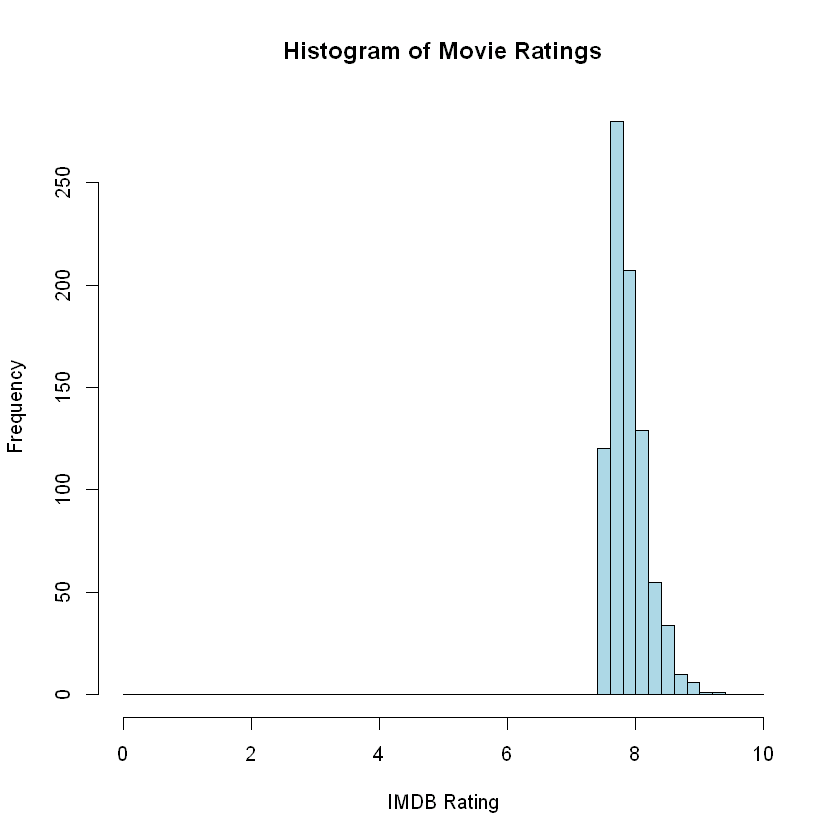

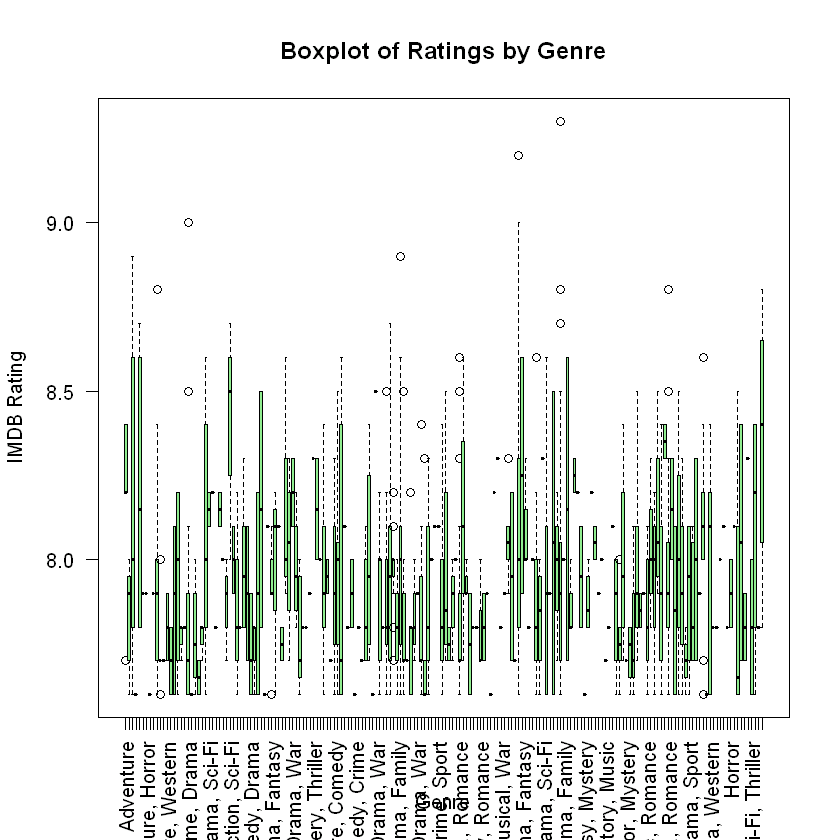


[1] "Action skewness:  1.28806142298977"
[1] "Comedy skewness:  1.03595567287406"
[1] "Drama skewness:  1.15062188653626"
[1] "Other skewness:  1.13537582633241"


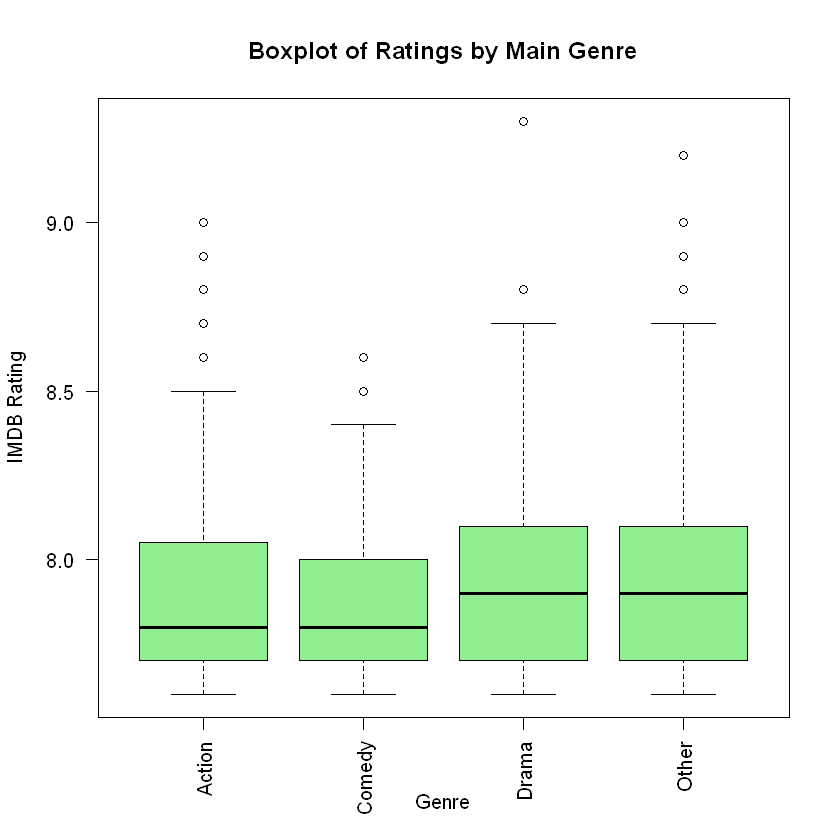

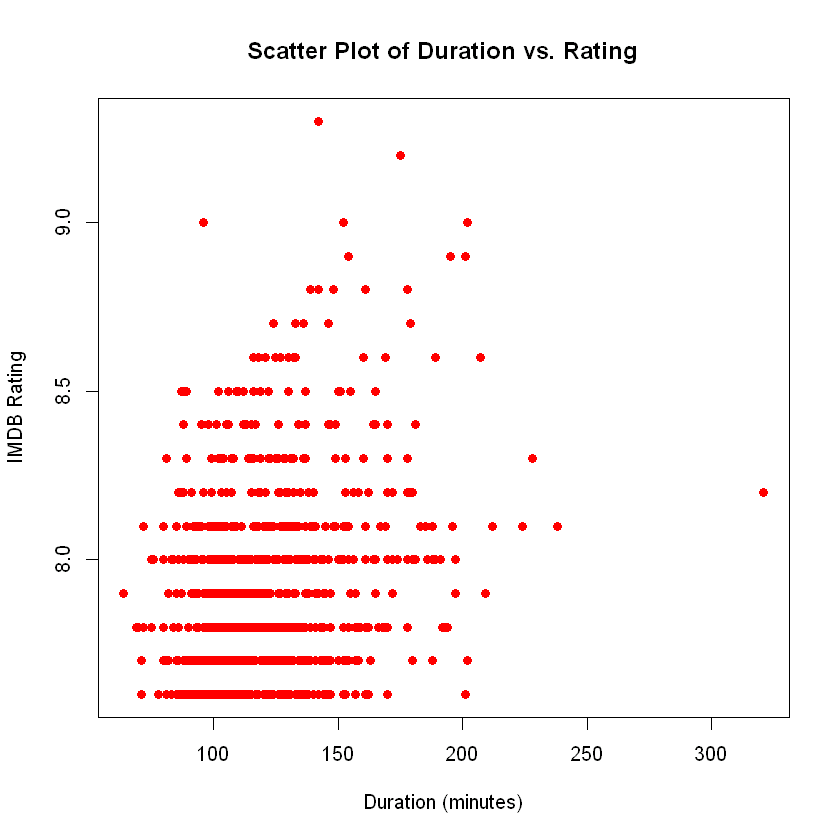

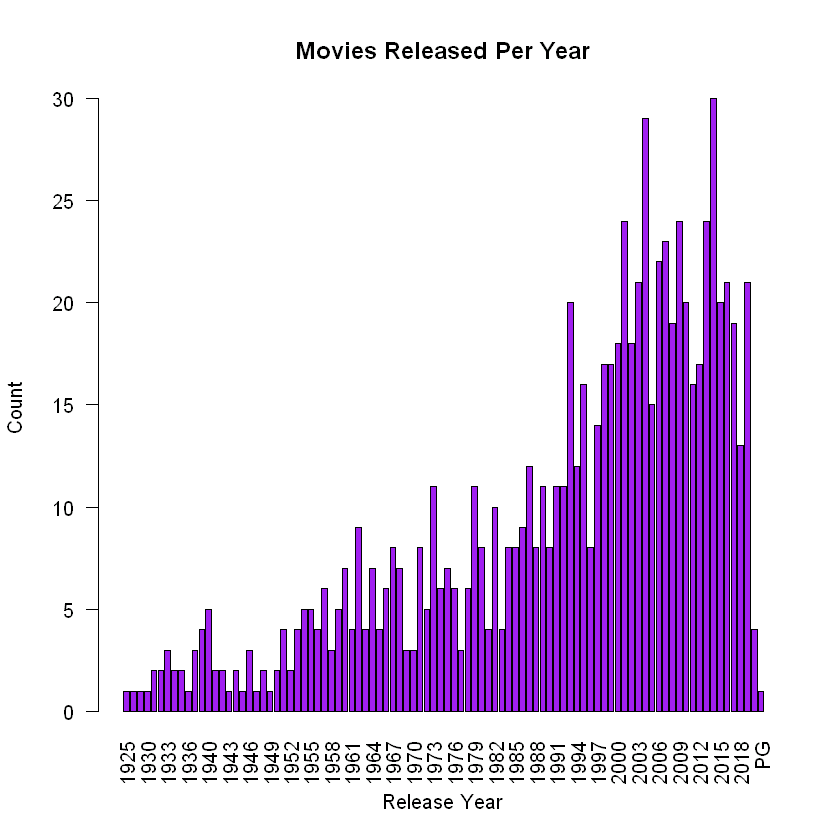

In [60]:
# Histogram for IMDb ratings
hist(dataset$IMDB_Rating, 
     main = "Histogram of Movie Ratings", breaks = seq(0, 10, by = 0.2), 
     xlab = "IMDB Rating", 
     col = "lightblue", 
     border = "black")
      
# Boxplot for ratings by Genre
boxplot(IMDB_Rating ~ Genre, 
        data = dataset, 
        main = "Boxplot of Ratings by Genre", 
        xlab = "Genre", 
        ylab = "IMDB Rating", 
        col = "lightgreen", 
        las = 2)  

# Clear the Genre
dataset$Primary_Genre <- sapply(strsplit(dataset$Genre, ",\\s*"), function(x) x[1])
# Count movies per primary genre
genre_counts <- table(dataset$Primary_Genre)
main_genres <- names(genre_counts[genre_counts > 100])

# Create new column with main genres and others
dataset$Genre_Cleaned <- ifelse(dataset$Primary_Genre %in% main_genres, dataset$Primary_Genre, "Other")

boxplot(IMDB_Rating ~ Genre_Cleaned, 
        data = dataset, 
        main = "Boxplot of Ratings by Main Genre", 
        xlab = "Genre", 
        ylab = "IMDB Rating", 
        col = "lightgreen", 
        las = 2)  

cat("\n")
# Calculate the skewness of the Genres
action <- subset(dataset, Genre_Cleaned == "Action", select = IMDB_Rating)
comedy <- subset(dataset, Genre_Cleaned == "Comedy", select = IMDB_Rating)
drama <- subset(dataset, Genre_Cleaned == "Drama", select = IMDB_Rating)
other <- subset(dataset, Genre_Cleaned == "Other", select = IMDB_Rating)

print(paste("Action skewness: ", skewness(action$IMDB_Rating)))
print(paste("Comedy skewness: ", skewness(comedy$IMDB_Rating)))
print(paste("Drama skewness: ", skewness(drama$IMDB_Rating)))
print(paste("Other skewness: ", skewness(other$IMDB_Rating)))


# Remove the " min" part and convert the result to numeric
dataset$Runtime_numeric <- as.numeric(gsub(" min", "", dataset$Runtime))

# Now, create the scatter plot using the new numeric column
plot(dataset$Runtime_numeric, dataset$IMDB_Rating, 
     main = "Scatter Plot of Duration vs. Rating", 
     xlab = "Duration (minutes)", 
     ylab = "IMDB Rating", 
     col = "red", 
     pch = 16)

# Calculate the counts of movies per release year
year_counts <- table(dataset$Released_Year)

# Create a bar plot 
barplot(year_counts, 
        main = "Movies Released Per Year", 
        xlab = "Release Year", 
        ylab = "Count", 
        col = "purple", 
        las = 2) 



Statistical Analysis

In [61]:
# Calculate the summary of Ratings
mean_rating <- mean(dataset$IMDB_Rating)
median_rating <- median(dataset$IMDB_Rating)
variance_rating <- var(dataset$IMDB_Rating)
sd_rating <- sd(dataset$IMDB_Rating)

print(paste("Mean Rating:", mean_rating))
print(paste("Median Rating:", median_rating))
print(paste("Variance of Rating:", variance_rating))
print(paste("Standard Deviation of Rating:", sd_rating))

cat("\n")
print(" ANOVA")
# ANOVA to test the differences among multiple genres.
anova_result <- aov(IMDB_Rating ~ Genre, data = dataset)
summary(anova_result)

# Filter dataset for Drama and Comedy
drama_comedy_data <- dataset %>% filter(Genre %in% c("Drama", "Comedy"))

# Conduct the t-test
t_test_result <- t.test(IMDB_Rating ~ Genre, data = drama_comedy_data)
print(t_test_result)

[1] "Mean Rating: 7.93167259786477"
[1] "Median Rating: 7.9"
[1] "Variance of Rating: 0.0805039686900365"
[1] "Standard Deviation of Rating: 0.283732212993231"

[1] " ANOVA"


             Df Sum Sq Mean Sq F value Pr(>F)
Genre       183  14.23 0.07775   0.957  0.637
Residuals   659  53.56 0.08127               


	Welch Two Sample t-test

data:  IMDB_Rating by Genre
t = -1.3754, df = 18.428, p-value = 0.1855
alternative hypothesis: true difference in means between group Comedy and group Drama is not equal to 0
95 percent confidence interval:
 -0.26434804  0.05495837
sample estimates:
mean in group Comedy  mean in group Drama 
            7.833333             7.938028 

